In [3]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import make_regression
# 신경망 - 정규화
from sklearn.preprocessing import MinMaxScaler

# X = 100x2, y = 100
X, y = make_regression(n_samples=100, n_features=2, noise=0.1, random_state=1)

# 값의 범위가 다름
scalarX, scalarY = MinMaxScaler(), MinMaxScaler()
scalarX.fit(X)
scalarY.fit(y.reshape(100,1)) # 행으로 만들어서
X = scalarX.transform(X)
y = scalarY.transform(y.reshape(100,1))

# Keras Model
model = Sequential()
# Dense -> FFNN망
# layer 3개(layer depth)
# 가중치 : 2x4 => 결과 : 100x4
model.add(Dense(4, input_dim=2, activation='relu')) # 가중치 생성(출력차수(=4)만 지정해주면)
# 100x4 4x4 100x4
model.add(Dense(4, activation='relu'))
# 100x4 4x1 100x1
model.add(Dense(1, activation='linear')) # linear:예측
# mse, cross entropy(분류), KL-divergence(분포비교)
model.compile(loss='mse', optimizer='adam') # tensorflow 모델을 변환(backend=tensorflow)
model.fit(X, y, epochs=1000, verbose=0)

Xnew, a = make_regression(n_samples=3, n_features=2, noise=0.1, random_state=1)
Xnew = scalarX.transform(Xnew)
ynew = model.predict(Xnew)

for i in range(len(Xnew)):
    print("입력데이터=%s, 예측결과=%s" %(Xnew[i], ynew[i]))

입력데이터=[0.29466096 0.30317302], 예측결과=[0.1727368]
입력데이터=[0.39445118 0.79390858], 예측결과=[0.7446588]
입력데이터=[0.02884127 0.6208843 ], 예측결과=[0.40274543]


In [16]:
from keras.models import Sequential # input 1개, output 1개인 망
from keras.layers import Dense
import numpy

numpy.random.seed(7)
dataset = numpy.loadtxt("pima.data", delimiter=",")
X = dataset[:, 0:8] # 8개 독립변수
Y = dataset[:, 8]   # 종속변수

model = Sequential()
# ?x8 8x12(가중치) => ?x12
model.add(Dense(12, input_dim=8, kernel_initializer="uniform", activation="relu"))
# ?x12 12x8(가중치) => ?x8
model.add(Dense(8, kernel_initializer="uniform", activation="relu"))
# ?x8 8x1(가중치) => ?x1
model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid")) # sigmoid:분류, 0.5기준으로
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) # metrics:무엇을 측정하겠는가
# validation_split
#  : 데이터를 분리 입력(train,test)할 때, test도 과적합
#  : train, validation, test으로 나눔
history = model.fit(X, Y, epochs=150, batch_size=10, validation_split=0.33)
scores = model.evaluate(X, Y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Train on 514 samples, validate on 254 samples
Epoch 1/150
514/514 [==============================] - 0s 783us/step - loss: 0.6797 - accuracy: 0.6401 - val_loss: 0.6586 - val_accuracy: 0.6732
Epoch 2/150
514/514 [==============================] - 0s 141us/step - loss: 0.6688 - accuracy: 0.6401 - val_loss: 0.6535 - val_accuracy: 0.6732
Epoch 3/150
514/514 [==============================] - 0s 114us/step - loss: 0.6619 - accuracy: 0.6401 - val_loss: 0.6517 - val_accuracy: 0.6732
Epoch 4/150
514/514 [==============================] - 0s 118us/step - loss: 0.6548 - accuracy: 0.6381 - val_loss: 0.6466 - val_accuracy: 0.6732
Epoch 5/150
514/514 [==============================] - 0s 114us/step - loss: 0.6456 - accuracy: 0.6420 - val_loss: 0.6356 - val_accuracy: 0.6811
Epoch 6/150
514/514 [==============================] - 0s 113us/step - loss: 0.6390 - accuracy: 0.6420 - val_loss: 0.6248 - val_accuracy: 0.6969
Epoch 7/150
514/514 [==============================] - 0s 116us/step - loss: 0.6297 

514/514 [==============================] - 0s 108us/step - loss: 0.5369 - accuracy: 0.7393 - val_loss: 0.5533 - val_accuracy: 0.7283
Epoch 57/150
514/514 [==============================] - 0s 132us/step - loss: 0.5384 - accuracy: 0.7393 - val_loss: 0.5604 - val_accuracy: 0.7402
Epoch 58/150
514/514 [==============================] - 0s 109us/step - loss: 0.5293 - accuracy: 0.7257 - val_loss: 0.5622 - val_accuracy: 0.7047
Epoch 59/150
514/514 [==============================] - 0s 109us/step - loss: 0.5419 - accuracy: 0.7296 - val_loss: 0.5442 - val_accuracy: 0.7441
Epoch 60/150
514/514 [==============================] - 0s 126us/step - loss: 0.5301 - accuracy: 0.7354 - val_loss: 0.5462 - val_accuracy: 0.7402
Epoch 61/150
514/514 [==============================] - 0s 111us/step - loss: 0.5312 - accuracy: 0.7451 - val_loss: 0.5496 - val_accuracy: 0.7559
Epoch 62/150
514/514 [==============================] - 0s 106us/step - loss: 0.5329 - accuracy: 0.7354 - val_loss: 0.5468 - val_accuracy

514/514 [==============================] - 0s 121us/step - loss: 0.5021 - accuracy: 0.7568 - val_loss: 0.5206 - val_accuracy: 0.7480
Epoch 113/150
514/514 [==============================] - 0s 113us/step - loss: 0.5093 - accuracy: 0.7490 - val_loss: 0.5126 - val_accuracy: 0.7638
Epoch 114/150
514/514 [==============================] - 0s 110us/step - loss: 0.5028 - accuracy: 0.7451 - val_loss: 0.5065 - val_accuracy: 0.7756
Epoch 115/150
514/514 [==============================] - 0s 111us/step - loss: 0.5044 - accuracy: 0.7471 - val_loss: 0.5085 - val_accuracy: 0.7874
Epoch 116/150
514/514 [==============================] - 0s 108us/step - loss: 0.5025 - accuracy: 0.7529 - val_loss: 0.5030 - val_accuracy: 0.7953
Epoch 117/150
514/514 [==============================] - 0s 114us/step - loss: 0.5085 - accuracy: 0.7432 - val_loss: 0.5387 - val_accuracy: 0.7638
Epoch 118/150
514/514 [==============================] - 0s 110us/step - loss: 0.5030 - accuracy: 0.7510 - val_loss: 0.5064 - val_ac

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


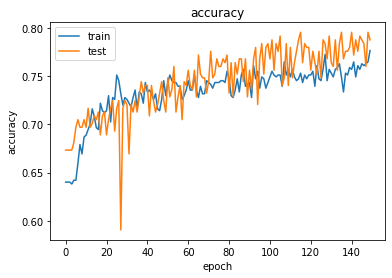

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# 기본 'loss', 'accuracy'
# validation_split하면 'val_loss', 'val_accuracy', 'loss', 'accuracy'
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

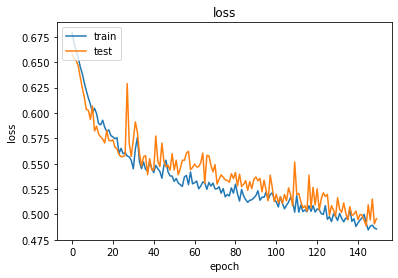

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [27]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X, Y = make_moons(noise=0.2, random_state=0, n_samples=1000)
X = scale(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.5)
print(X.shape) # 1000 x 2
print(Y.shape)

(1000, 2)
(1000,)


[Text(0, 0.5, 'Y'),
 Text(0.5, 0, 'x'),
 Text(0.5, 1.0, 'history classification')]

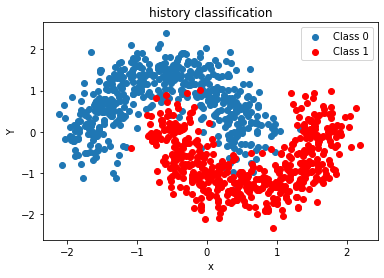

In [28]:
fig, ax = plt.subplots()
ax.scatter(X[Y==0, 0], X[Y==0, 1], label="Class 0")
ax.scatter(X[Y==1, 0], X[Y==1, 1], color="r", label="Class 1")
ax.legend()
ax.set(xlabel="x", ylabel="Y", title="history classification")

In [31]:
import keras
# 비선형일 때 신경망을 사용한다.
model = Sequential()
# 입력데이터 1000x2 2x32 => 1000x32 (차원확대 2->32 => 설명이 잘된다)
model.add(Dense(32, input_dim=2, activation="relu"))
# 1000x32 32x1 = 33 + bias1개 = 34 => 1000x1(분류)
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="AdaDelta", loss="binary_crossentropy", metrics=["accuracy"])

# callback함수 : winodows에서 event후에 자동으로 호출되어지는 함수
# graph image 출력
tb_callback = keras.callbacks.TensorBoard(log_dir="./Graph/model_1/",
                                          histogram_freq=100,
                                          write_graph=True,
                                          write_images=False)
tb_callback.set_model(model) # callback함수를 model에 등록

C:\Users\ICT01_16\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [36]:
hist = model.fit(X_train, Y_train, batch_size=32, epochs=200, verbose=0, validation_data=(X_test, Y_test), callbacks=[tb_callback])

In [37]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.09846816992759705
Test accuracy: 0.9660000205039978


In [39]:
keras.utils.print_summary(model)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


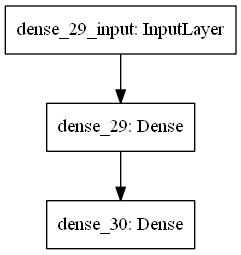

In [40]:
keras.utils.plot_model(model)

In [42]:
%matplotlib inline
from keras.utils.vis_utils import model_to_dot
model_to_dot(model)

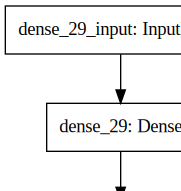

In [44]:
from IPython.display import Image, SVG
SVG(model_to_dot(model).create(prog="dot", format="svg"))

In [46]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 33        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [56]:
from keras.datasets import mnist
import matplotlib.pylab as plt
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()
print(X_train0.shape, X_train0.dtype) # (60000, 28x28)
print(y_train0.shape, y_train0.dtype) # (60000,)
print(X_test0.shape, X_test0.dtype)   # (10000, 28x28)
print(y_test0.shape, y_test0.dtype)   # (10000,)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


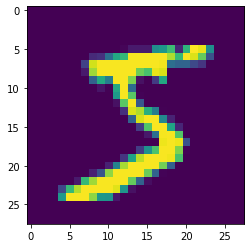

In [57]:
plt.imshow(X_train0[0])
plt.grid(False)
plt.show()

In [58]:
# fully-connected : flatten <- FFNN은 데이터가 한줄로
# 이미지 정규화 : 0~255의 컬러값을 갖기때문에 '/255' 하면은 => 0~1
X_train = X_train0.reshape(60000, 784).astype("float32") / 255.0
X_test = X_test0.reshape(10000, 784).astype("float32") / 255.0
print(X_train.shape, X_train.dtype) # 60000 x 784

(60000, 784) float32


In [59]:
# multi-label일 경우에 softmax
# 경우의 수에 대한 확률값
y_train0[:5] # one-hot-encoding여부 = X (5, 0, 4, 1, 9)

array([5, 0, 4, 1, 9], dtype=uint8)

In [60]:
# one-hot-encoding
from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [72]:
import numpy as np
from keras.optimizers import SGD

np.random.seed(0)
model = Sequential()
# 60000 x 784, 784 x 15 => 60000 x 15
###### 1번
#model.add(Dense(15, input_dim=784, activation="sigmoid"))

###### 2번(문제.출력차수가 512인 레이어를 추가하시요.)
model.add(Dense(512, input_dim=784, activation="sigmoid"))
model.add(Dense(15))

# 60000 x 15, 15 x 10 => 60000 x 10
model.add(Dense(10, activation="sigmoid"))
# lr = Learning Rate
# SGD(Stochastic Gradient Descent)
model.compile(optimizer=SGD(lr=0.2), loss="mean_squared_error", metrics=["accuracy"])

In [73]:
model.layers

In [74]:
l1 = model.layers[0]
l2 = model.layers[1]
#레이어 속성으로 정보 확인
l1.name
l1.input_shape
l1.output_shape

(None, 15)

In [95]:
# Callback Class
# custom callback함수의 제장
# Callback function : 함수에 의해서 호출되는 객체(함수)
class CustomHistory(keras.callbacks.Callback): # keras.callbacks.Callback을 상속받는다.
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
    def on_epoch_end(self, batch, logs={}): # overriding
        self.train_loss.append(logs.get("loss"))
        self.val_loss.append(logs.get("val_loss"))
        self.train_acc.append(logs.get("accuracy"))
        self.val_acc.append(logs.get("val_accuracy"))

C:\Users\ICT01_16\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 0s - loss: 0.0424 - accuracy: 0.7926 - val_loss: 0.0418 - val_accuracy: 0.8032
Epoch 2/30
 - 0s - loss: 0.0423 - accuracy: 0.7934 - val_loss: 0.0416 - val_accuracy: 0.8043
Epoch 3/30
 - 0s - loss: 0.0421 - accuracy: 0.7947 - val_loss: 0.0414 - val_accuracy: 0.8061
Epoch 4/30
 - 0s - loss: 0.0419 - accuracy: 0.7959 - val_loss: 0.0412 - val_accuracy: 0.8071
Epoch 5/30
 - 0s - loss: 0.0417 - accuracy: 0.7971 - val_loss: 0.0411 - val_accuracy: 0.8077
Epoch 6/30
 - 0s - loss: 0.0416 - accuracy: 0.7982 - val_loss: 0.0409 - val_accuracy: 0.8090
Epoch 7/30
 - 0s - loss: 0.0414 - accuracy: 0.7997 - val_loss: 0.0407 - val_accuracy: 0.8101
Epoch 8/30
 - 0s - loss: 0.0412 - accuracy: 0.8009 - val_loss: 0.0405 - val_accuracy: 0.8107
Epoch 9/30
 - 0s - loss: 0.0411 - accuracy: 0.8019 - val_loss: 0.0404 - val_accuracy: 0.8120
Epoch 10/30
 - 0s - loss: 0.0409 - accuracy: 0.8029 - val_loss: 0.0402 - val_accuracy: 0.8134
Epoch 11/30
 - 0s -

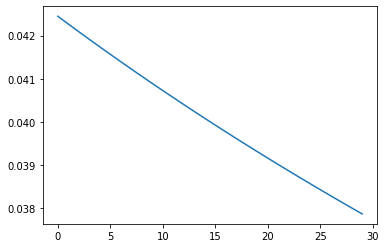

In [96]:
# callback function 사용
custom_hist = CustomHistory()
custom_hist.init()

hist = model.fit(X_train, Y_train,
                 nb_epoch=30,
                 batch_size=1000,
                 validation_data=(X_test, Y_test),
                 verbose=2,
                 callbacks=[custom_hist])
plt.plot(hist.history["loss"])
plt.show()

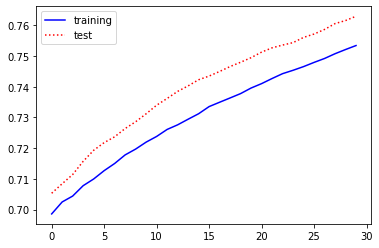

{'batch_size': 1000, 'epochs': 30, 'steps': None, 'samples': 60000, 'verbose': 2, 'do_validation': True, 'metrics': ['loss', 'accuracy', 'val_loss', 'val_accuracy']}
[0.6985667, 0.70246667, 0.7043833, 0.70776665, 0.70995, 0.7126667, 0.715, 0.7178, 0.7197, 0.7219667, 0.7238167, 0.7261, 0.7276, 0.72943336, 0.73121667, 0.73355, 0.7349667, 0.7363667, 0.7377833, 0.7396, 0.7410333, 0.7427, 0.7442833, 0.7453833, 0.74658334, 0.74795, 0.7492333, 0.7507833, 0.75215, 0.75345]
0.7630000114440918


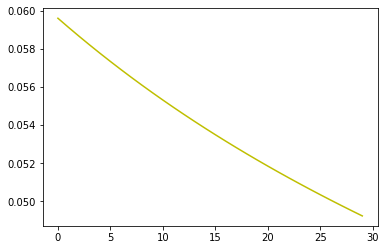

In [87]:
plt.plot(hist.history["accuracy"], "b-", label="training")
plt.plot(hist.history["val_accuracy"], "r:", label="test")
plt.legend()
plt.show()

print(hist.model)
print(hist.params)
print(hist.history["accuracy"])
print(hist.history["val_accuracy"][29])
plt.show()
plt.plot(custom_hist.train_loss, "y", label="train loss")
plt.show()

In [90]:
# 문제. X_test의 이미지 한장의 label을 예측해보시요.
model.predict(X_test[:1, :]) # 결과 - 10개의 확률값으로 나옴

array([[0.07415864, 0.08587241, 0.04527071, 0.06132445, 0.06452432,
        0.10666728, 0.03897312, 0.78835607, 0.05914165, 0.14206848]],
      dtype=float32)

In [92]:
model.predict_classes(X_test[:1, :], verbose=0) # 

array([7], dtype=int64)

In [97]:
# 출력차수가 512인 레이어를 추가하시요.(위에 있음)

In [105]:
# boston 집값 예측
from keras.datasets import boston_housing
# x_train : 404 x 13, y_train : 404
# x_test : 102 x 13, t_test : 102
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
num_features = 13

In [106]:
model = Sequential()
model.add(Dense(1, input_dim=num_features, activation="linear"))

In [108]:
model.summary()
model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
model.fit(x_train, y_train, batch_size=1, epochs=10, verbose=1)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 1)                 14        
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
404/404 [==============================] - 0s 970us/step - loss: 13692.7661 - mae: 87.4894
Epoch 2/10
404/404 [==============================] - 0s 625us/step - loss: 3672.1942 - mae: 47.6346
Epoch 3/10
404/404 [==============================] - 0s 644us/step - loss: 1669.4015 - mae: 32.8422
Epoch 4/10
404/404 [==============================] - 0s 662us/step - loss: 662.0916 - mae: 20.9115
Epoch 5/10
404/404 [==============================] - 0s 620us/step - loss: 296.3069 - mae: 13.1076
Epoch 6/10
404/404 [==============================] - 0s 636us/step - loss: 197.4241 - mae: 9.8756
Epoch 7/10
404/404 [============================

In [110]:
# accuracy
mse, mae = model.evaluate(x_test, y_test, verbose=False)
rmse = np.sqrt(mse)
mse, rmse, mae

(92.46016573438457, 9.615620922976559, 6.699459075927734)

In [132]:
# 문제. X_test의 앞의 3개의 집을 예측하시요.
pred = model.predict(x_test[:3, :])
pred

array([[ 7.223572],
       [27.413084],
       [20.327425]], dtype=float32)

In [133]:
real = y_test[:3]
real

array([ 7.2, 18.8, 19. ])

In [136]:
# 상관계수를 확인하시요.
import numpy as np
np.corrcoef(pred.reshape(3), real)

array([[1.        , 0.93305896],
       [0.93305896, 1.        ]])

In [1]:
# scikits - keras 연결 => KerasClassifier, KerasRegressor
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

Using TensorFlow backend.


In [8]:
# 과적합을 방지 : 
# 입력768x9 => (768,8), (768,1) 종속변수
# 변수 8개
#def create_model(init_mode="uniform", activation="relu", dropout_rate=0.1):
#    model = Sequential()
#    # 8x12(가중치) => 768x12
#    #model.add(Dense(12, input_dim=8, activation="relu"))
#    # 문제2) dense1에는 activation함수를 넣어주고, 가장 좋은 activation함수를 결정하시요.
#    model.add(Dense(12, input_dim=8, activation=activation))
#    
#    model.add(Dropout(dropout_rate))
#    
#    # 768x12 => 768x1
#    #model.add(Dense(1, activation="sigmoid")) # 0~1사이의 값으로
#    # 문제1) dense2에 가중치 초기화 매개변수를 넣어주고, 가장 최적의 가중치 초기화 파라미터를 결정하시요.
#    model.add(Dense(1, kernel_initializer=init_mode, activation="sigmoid"))
#    
#    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
#    return model
#
#seed = 7
#numpy.random.seed(seed)
#dataset = numpy.loadtxt("pima.csv", delimiter=",")
#
#X = dataset[:, 0:8]
#Y = dataset[:, 8]
## Create model
## EarlyStopping
#from keras.callbacks import EarlyStopping
#stopper = EarlyStopping(monitor="val_accuracy", patience=3, verbose=1)
#
#model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=40)

In [2]:
def create_model(init_mode='uniform', activation='relu', dropout_rate=0.1):
    model = Sequential()
    model.add(Dense(12, kernel_initializer='uniform', input_dim=8,  activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init_mode, activation=activation))
    model.compile(loss='binary_crossentropy', optimizer='adam',
                 metrics=['accuracy'])
    return model
from keras.callbacks import EarlyStopping
stopper = EarlyStopping(monitor='val_acc', patience=3, verbose=1)

seed = 7
numpy.random.seed(seed)
dataset = numpy.loadtxt("pima.data", delimiter=",")
X = dataset[:, 0:8]
Y = dataset[:, 8]
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=40, verbose=0)
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
init_mode =   ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal',
 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus']
param_grid =  dict(activation=activation, init_mode=init_mode, dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
fit_params = dict(callbacks=[stopper])
grid_result = grid.fit(X, Y, **fit_params)

print("최적스코어: %f   사용한 파라미터조합 : %s" % (grid_result.best_score_,
                                      grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\Users\ICT01_16\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ICT01_16\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



C:\Users\ICT01_16\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


최적스코어: 0.738281   사용한 파라미터조합 : {'activation': 'softplus', 'dropout_rate': 0.1, 'init_mode': 'glorot_uniform'}
0.348958 (0.024774) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'uniform'}
0.348958 (0.024774) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'lecun_uniform'}
0.348958 (0.024774) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'normal'}
0.348958 (0.024774) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'zero'}
0.348958 (0.024774) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'glorot_normal'}
0.348958 (0.024774) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'glorot_uniform'}
0.348958 (0.024774) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'he_normal'}
0.348958 (0.024774) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'init_mode': 'he_uniform'}
0.348958 (0.024774) with: {'activation': 'softmax', 'dropout_rate': 0.1, 'init_mode': 'uniform

In [ ]:
# parameter 조합 만들기
#dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
#init_mode = ["uniform", "lecun_uniform", "normal", "zero", "glorot_normal", "glorot_uniform",
#            "he_normal", "he_uniform"]
#activation = ["softmax", "softplus", "softsign", "relu", "tanh", "sigmoid", "hard_sigmoid",
#             "linear"]
#
#batch_size = [10, 20, 40, 60, 80, 100]
#epochs = [10, 50, 100]
##param_grid = dict(batch_size=batch_size, epochs=epochs)
#param_grid = dict(init_mode=init_mode, activation=activation, dropout_rate=dropout_rate)
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1) # n_jobs:참여하는 CPU개수(-1=전부)
#fit_params = dict(callbacks=[stopper])
#
## 변동매개변수
#grid_result = grid.fit(X, Y, **fit_params)
#
#print("최적스코어: %f      사용한 파라미터 조합 : %s" %(grid_result.best_score_,grid_result.best_params_))
#means = grid_result.cv_results_["mean_test_score"]
#stds = grid_result.cv_results_["std_test_score"]
#params = grid_result.cv_results_["params"]
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" %(mean, stdev, param))

C:\Users\ICT01_16\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\ICT01_16\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [151]:
# 문제.
# 1) dense2에 가중치 초기화 매개변수를 넣어주고, 가장 최적의 가중치 초기화 파라미터를 결정하시요.
# 가중치 초기화 매개변수 -> kenel_initializer

# 2) dense1에는 activation함수를 넣어주고, 가장 좋은 activation함수를 결정하시요.


In [153]:
keras.__version__

'2.3.1'

In [ ]:
import tensorflow as tf
tf.__version__

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import pandas
import numpy

In [13]:
dataframe = pandas.read_csv("housing.csv", delim_whitespace=True, header=None)
dataset = dataframe.values
X = dataset[:, 0:13]
Y = dataset[:, 13]

In [14]:
def baseline_model():
    model = Sequential()
    # 506x13 13x13 => 506 x 13
    model.add(Dense(13, input_dim=13, kernel_initializer="normal", activation="relu"))
    # 506x13 13x1 => 506 x 1
    model.add(Dense(1, kernel_initializer="normal"))
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

In [15]:
def larger_model():
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer="normal", activation="relu"))
    
    # 추가
    model.add(Dense(6, kernel_initializer="normal", activation="relu"))
    
    model.add(Dense(1, kernel_initializer="normal"))
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

In [16]:
def wider_model():
    model = Sequential()
    
    # 13->20 변경
    model.add(Dense(20, input_dim=13, kernel_initializer="normal", activation="relu"))
    
    model.add(Dense(1, kernel_initializer="normal"))
    model.compile(loss="mean_squared_error", optimizer="adam")
    return model

In [17]:
seed = 7
numpy.random.seed(seed)
# 1. baseline_model 사용
#estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5, verbose=0)
# 2. lager_model 사용
estimator = KerasRegressor(build_fn=wider_model, nb_epoch=100, batch_size=5, verbose=0)

In [18]:
# 10개 중에 한개는 validation
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -101.95 (72.26) MSE


In [19]:
numpy.random.seed(seed)

estimators = []
estimators.append(("standardize", StandardScaler()))
estimators.append(("mlp", KerasRegressor(build_fn=wider_model, epochs=50, batch_size=5, verbose=0)))

# pipeline 매개변수가 리스트를 요구한다.
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, Y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -24.34 (24.88) MSE


In [20]:
pipeline.fit(X, Y)

Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('mlp',
                 <keras.wrappers.scikit_learn.KerasRegressor object at 0x0000016BFC4B7B48>)],
         verbose=False)

In [21]:
res = pipeline.predict(X)
res[0]
# 29.81923
# 28.182102
# 27.941034

27.941034

In [22]:
# 상관계수
import numpy as np
np.corrcoef(res, Y)
# array([[1.        , 0.91280602],
#        [0.91280602, 1.        ]])
# array([[1.        , 0.93655368],
#       [0.93655368, 1.        ]])
# array([[1.        , 0.90470094],
#       [0.90470094, 1.        ]])

array([[1.        , 0.90470094],
       [0.90470094, 1.        ]])